In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

c:\Users\thoma\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
weather = pd.read_csv("weather_final.csv", encoding ='cp949')

In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1022 non-null   int64  
 1   NO               1022 non-null   int64  
 2   측정일자             1022 non-null   object 
 3   측정시간             1022 non-null   int64  
 4   지역               1022 non-null   object 
 5   지역명              1022 non-null   object 
 6   도로명              1022 non-null   object 
 7   시작점              1022 non-null   object 
 8   종점               1022 non-null   object 
 9   측정거리(km)         1022 non-null   float64
 10  기온(℃)            1022 non-null   int64  
 11  습도(%)            1022 non-null   int64  
 12  재비산먼지 평균농도(㎍/㎥)  1022 non-null   int64  
 13  상태               1022 non-null   object 
 14  year             1022 non-null   int64  
 15  month            1022 non-null   int64  
 16  측정거리별_평균농도       1022 non-null   float64
 17  year_평균농도     

In [5]:
weather_cond = weather[['측정거리(km)','기온(℃)','습도(%)','상태','X','Y']];weather_cond

,측정거리(km),기온(℃),습도(%),상태,X,Y
0,4.14,11,28,매우좋음,967021.5,1949750.0
1,4.61,12,23,좋음,968658.5,1949766.5
2,5.33,14,18,매우좋음,967190.5,1945240.5
3,5.79,15,16,매우좋음,965292.0,1944584.0
4,2.26,13,54,매우좋음,962743.5,1955096.5
...,...,...,...,...,...,...
1017,5.27,-1,39,매우좋음,967190.5,1945240.5
1018,2.97,-1,38,매우좋음,964337.5,1946034.0
1019,1.44,-1,39,매우좋음,965192.5,1946662.0
1020,2.22,-1,40,좋음,967015.5,1946127.5


In [6]:
weather_good = weather_cond[(weather_cond['상태']=='매우좋음') | (weather_cond['상태']=='좋음')]
weather_bad = weather_cond[(weather_cond['상태']=='매우나쁨') | (weather_cond['상태']=='나쁨')]

In [7]:
weather_good

,측정거리(km),기온(℃),습도(%),상태,X,Y
0,4.14,11,28,매우좋음,967021.5,1949750.0
1,4.61,12,23,좋음,968658.5,1949766.5
2,5.33,14,18,매우좋음,967190.5,1945240.5
3,5.79,15,16,매우좋음,965292.0,1944584.0
4,2.26,13,54,매우좋음,962743.5,1955096.5
...,...,...,...,...,...,...
1017,5.27,-1,39,매우좋음,967190.5,1945240.5
1018,2.97,-1,38,매우좋음,964337.5,1946034.0
1019,1.44,-1,39,매우좋음,965192.5,1946662.0
1020,2.22,-1,40,좋음,967015.5,1946127.5


In [8]:
weather_bad

,측정거리(km),기온(℃),습도(%),상태,X,Y
14,0.97,9,100,나쁨,940123.5,1952174.5
31,2.52,8,53,나쁨,961047.0,1957338.5
49,4.70,6,55,나쁨,947066.5,1939917.5
82,2.83,7,50,매우나쁨,948298.0,1951090.0
120,1.49,17,80,매우나쁨,945481.5,1943919.5
180,1.41,3,68,매우나쁨,940587.0,1951687.0
215,0.96,7,54,나쁨,965678.5,1941667.0
268,1.14,9,33,매우나쁨,953449.5,1953509.0
305,0.60,-4,40,나쁨,958498.0,1954009.0
355,4.25,-2,44,매우나쁨,967021.5,1949750.0


In [9]:
# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns

plt.rc('font', family = 'malgun Gothic')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

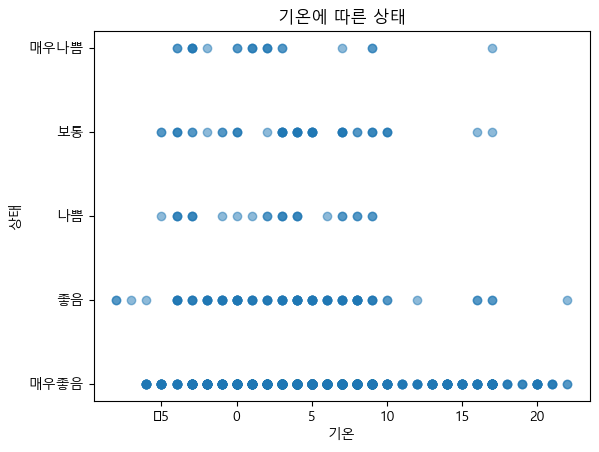

In [10]:
X = weather_cond['기온(℃)']
Y = weather_cond['상태']

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('기온에 따른 상태')
plt.xlabel('기온')
plt.ylabel('상태')
plt.show()

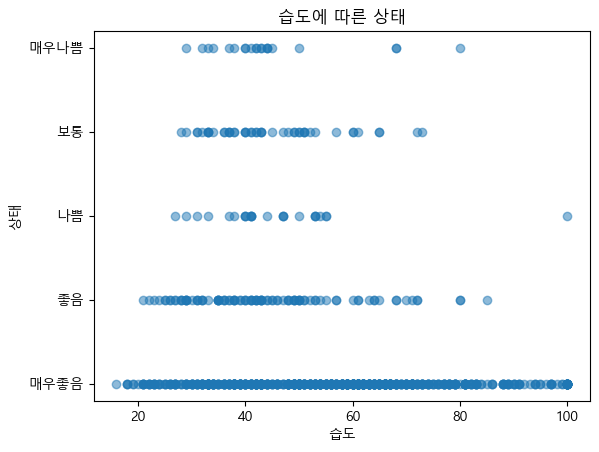

In [11]:
X = weather_cond['습도(%)']
Y = weather_cond['상태']

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('습도에 따른 상태')
plt.xlabel('습도')
plt.ylabel('상태')
plt.show()

습도, 기온에 대한 지수산출

In [23]:
weather_cond

,측정거리(km),기온(℃),습도(%),상태,X,Y
0,4.14,11,28,매우좋음,967021.5,1949750.0
1,4.61,12,23,좋음,968658.5,1949766.5
2,5.33,14,18,매우좋음,967190.5,1945240.5
3,5.79,15,16,매우좋음,965292.0,1944584.0
4,2.26,13,54,매우좋음,962743.5,1955096.5
...,...,...,...,...,...,...
1017,5.27,-1,39,매우좋음,967190.5,1945240.5
1018,2.97,-1,38,매우좋음,964337.5,1946034.0
1019,1.44,-1,39,매우좋음,965192.5,1946662.0
1020,2.22,-1,40,좋음,967015.5,1946127.5


In [136]:
scaler = MinMaxScaler()
weather_cond['습도_log'] = np.log(weather_cond['습도(%)'])
weather_cond['기온_mms'] = scaler.fit_transform(weather_cond['기온(℃)'].values.reshape(-1, 1))


In [137]:
def state_score(x):
    if x == '매우좋음':
        return 5
    elif x == '좋음':
        return 4
    elif x == '보통':
        return 3
    elif x == '나쁨':
        return 2
    else:
        return 1

In [138]:
weather_cond['상태_score'] = weather['상태'].apply(lambda x: state_score(x))

In [139]:
weather_cond

,측정거리(km),기온(℃),습도(%),상태,X,Y,습도_ss,기온_mms,상태_score,weather_지수,습도_log
0,4.14,11,28,매우좋음,967021.5,1949750.0,3.332205,0.633333,5,0.226138,3.332205
1,4.61,12,23,좋음,968658.5,1949766.5,3.135494,0.666667,4,0.181075,3.135494
2,5.33,14,18,매우좋음,967190.5,1945240.5,2.890372,0.733333,5,0.226044,2.890372
3,5.79,15,16,매우좋음,965292.0,1944584.0,2.772589,0.766667,5,0.225982,2.772589
4,2.26,13,54,매우좋음,962743.5,1955096.5,3.988984,0.700000,5,0.219372,3.988984
...,...,...,...,...,...,...,...,...,...,...,...
1017,5.27,-1,39,매우좋음,967190.5,1945240.5,3.663562,0.233333,5,0.239753,3.663562
1018,2.97,-1,38,매우좋음,964337.5,1946034.0,3.637586,0.233333,5,0.239822,3.637586
1019,1.44,-1,39,매우좋음,965192.5,1946662.0,3.663562,0.233333,5,0.239753,3.663562
1020,2.22,-1,40,좋음,967015.5,1946127.5,3.688879,0.233333,4,0.191748,3.688879


In [140]:
weather_cond['weather_지수'] = weather_cond.apply(lambda x: (x['상태_score']) / ((x['습도_log'] * x['기온_mms'])+20),  axis =1)

In [141]:
weather_cond['weather_지수'].describe()

count    1022.000000
mean        0.213958
std         0.038635
min         0.042280
25%         0.217514
50%         0.227488
75%         0.232167
max         0.247005
Name: weather_지수, dtype: float64

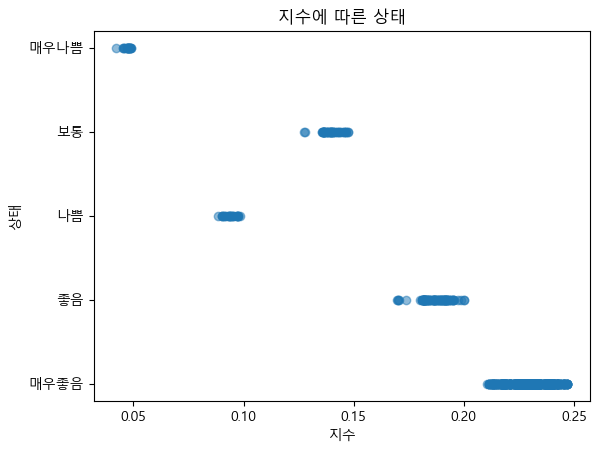

In [142]:
X = weather_cond['weather_지수']
Y = weather_cond['상태']

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('지수에 따른 상태')
plt.xlabel('지수')
plt.ylabel('상태')
plt.show()

In [143]:
weather_cond.to_csv("weather_cond.csv", index = False, encoding = 'cp949')